# Matriz de confusión

Cuando las clases estám desequilibradas, es decir no son 1:1, se necesitan nuevas métricas para determinar la eficiencia del modelo de predicción

Una clase con la etiqueta "1" se llama positiva y una clase con la etiqueta 
"0" se llama negativa. Si combinamos estas respuestas con predicciones, obtendremos la siguiente división:

1. Respuestas verdaderas positivas (VP): el modelo etiquetó un objeto como "1", y su 
valor real también es "1”
2. Respuestas verdaderas negativas (VN): el modelo etiquetó un objeto como "0", y su 
valor real también es "0”
3. Respuestas falsas positivas (FP): el modelo etiquetó un objeto como "1", pero su 
valor real es "0”
4. Respuestas falsas negativas (FN): el modelo etiquetó un objeto como "0", pero su 
valor real es "1

Cuando VP, FP, VN y FN se recopilan en una tabla, se denomina **MATRIZ DE CONFUSIÓN**. La matriz se forma de la siguiente manera:

1. Las etiquetas del algoritmo (0 y 1) se colocan en el eje horizontal ("Predicciones").
2. Las etiquetas verdaderas de la clase (0 y 1) se colocan en el eje vertical 
("Respuestas").

1.  Las predicciones correctas están en la diagonal principal (desde la esquina superior 
izquierda):
    VN en la esquina superior izquierda
    VP en la esquina inferior derecha
2.  Las predicciones incorrectas están fuera de la diagonal principal:
    FP en la esquina superior derecha
    FN en la esquina inferior izquierda

La matriz de confusión se encuentra en el módulo sklearn.metrics, que ya conoces. La 
función confusion_matrix() toma respuestas y predicciones correctas y devuelve una 
matriz de confusión.

<center><div> <img src="fig/matrix.png" alt="Drawing" style="width: 800px;"/></div><center>

https://rapidminer.com/glossary/confusion-matrix/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

import seaborn as sns 
import pandas as pd

from sklearn.datasets import make_classification # Generate a random n-class classification problem.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import metrics

# Generamos un dataset de dos clases
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=2)
# Entrenamos nuestro modelo de reg log
lr = LogisticRegression()
lr.fit(x_train,y_train)



LogisticRegression()

Text(0.5, 1.0, 'Confusion matrix')

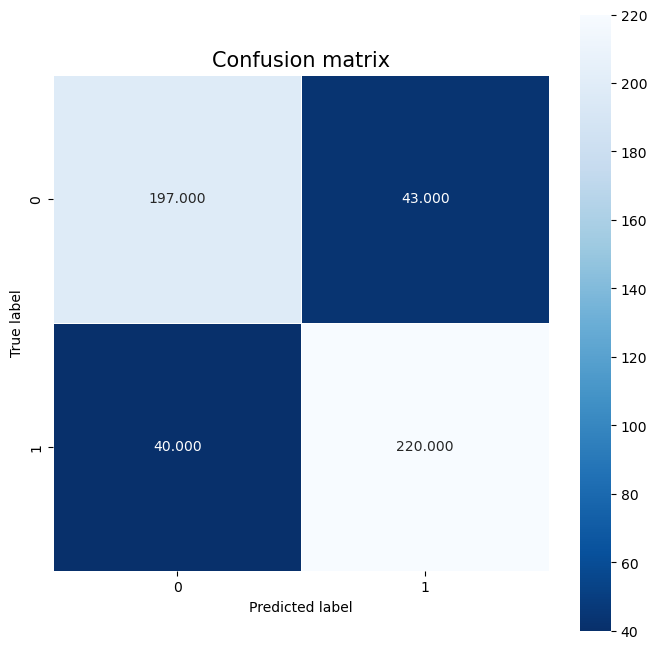

In [2]:
y_pred = lr.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)


* La clase final se determinará utilizando esta probabilidad y un umbral de decisión, este umbral puede ser ajustado para modificar el comportamiento de nuestro modelo para un problema específico.

* Los dos tipos errores de predicción son:

1. **Falso Positivo**: Predecir un evento cuando no hubo evento
2. **Falso Negativo**: Predecir que no hubo un evento cuando sí que hubo evento

El balanceo entre estos dos errores es lo que nos otorgará el nivel de umbral óptimo.

La matriz de confusión te ayudará a crear nuevas métricas:

### Recall (sensibilidad) 

Revela qué porción de respuestas positivas ha identificado el 
modelo entre todas las respuestas.

\begin{align}
Recall = \frac{VP}{VP+FN}
\end{align}

* Recall es una métrica de evaluación que mide la proporción de respuestas VP entre 
todas las respuestas que realmente tienen una etiqueta 1. 
* Si el valor de recall esté cerca de 1, el modelo es bueno para identificar verdaderos positivos. 
* Si está más cerca de cero, es necesario revisar y reparar el modelo

In [3]:
from sklearn.metrics import recall_score 
recall_score(y_test, y_pred)

0.8461538461538461

### Precisión

La precisión mide cuántas respuestas negativas encontró el modelo mientras buscaba 
respuestas positivas. Cuantas más respuestas negativas se encuentren, menor será la 
precisión

\begin{align}
Precisión = \frac{VP}{VP+FP}
\end{align}

* El valor de precisión cerca de 1. 

In [4]:
from sklearn.metrics import precision_score 
precision_score(y_test, y_pred)

0.8365019011406845

### Valor F1

Recall y precisión evalúan la calidad de las predicciones de la clase positiva desde 
diferentes ángulos. 

* Recall describe qué tan bien entendió el modelo las propiedades de 
esta clase y qué tan bien reconoció la clase. 
*Precisión detecta si el modelo se está excediendo al asignar demasiadas etiquetas positivas.

Las métricas de agregación, una de las cuales es el valor **F1**, ayudan a controlarlas de forma simultánea. Esta es la media armónica de recall y precisión. 

* Si F1 = 1 significa que la relación de recall a precisión es 1:1

\begin{align}
F1 = \frac{2*Precisión*Recall}{Precisión+Recall}
\end{align}

* Cuando recall o precisión están cerca de cero, la media armónica se acerca a 0.

Si una clase positiva se pronostica de manera deficiente en una de las escalas (recall o 
precisión), un valor F1 cercano a cero indicará que la predicción de la clase ha 
fallado.


In [5]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8413001912045889

# Curva ROC Receiver Operating Characteristic (Característica Operativa del Receptor).

Para interpretar correctamente las predicciones realizadas por modelos de clasificación binarios utilizaremos las curvas ROC y las curvas de precisión-sensibilidad (Precision-Recall).

* La **curva ROC** es una gráfica de la razón de falsos positivos (eje x) y de la razón de verdaderos positivos (eje y) dado un umbral, es decir, nos da la "falsa alarma" vs la tasa de éxito.

* La tasa de verdaderos positivos se calcula como el número de positivos verdaderos divididos entre el número de positivos verdaderos y de falsos negativos, es decir, la **sensibilidad** de nuestro modelo para prediciendo las clases positivas cuando la salida real es positiva. 

* La tasa de falsos positivos se calcula como el número de falsos positivos dividido entre la suma de falsos positivos con los verdaderos negativos. Se considera como la tasa de "falsa alarma", es decir, que una clase negativa sea determinada por el modelo como positiva.

* La **especificidad** es la inversa de la tasa de falsos positivos. Se obtiene dividiendo el número total de verdaderos negativos entre la suma de los verdaderos negativos y los falsos positivos. 

La curva **ROC** permite comparar diferentes modelos para identificar cual otorga mejor rendimiento como clasificador y el área debajo de la curva (**AUC)** es el resumen de la calidad del modelo.

* Valores pequeños en el eje X indican pocos falsos positivos y muchos verdaderos negativos
* Valores grandes en el eje Y indican elevados verdaderos positivos y pocos falsos negativos

1. El modelo morado representa a un clasificador perfecto. 
2. Las curvas más alejadas son los peores modelos. 
3. Un modelo aleatorio sin entrenar es una línea horizontal a media altura (0.5).

<center><div> <img src="fig/rocv2.png" alt="Drawing" style="width: 800px;"/></div><center>

https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/


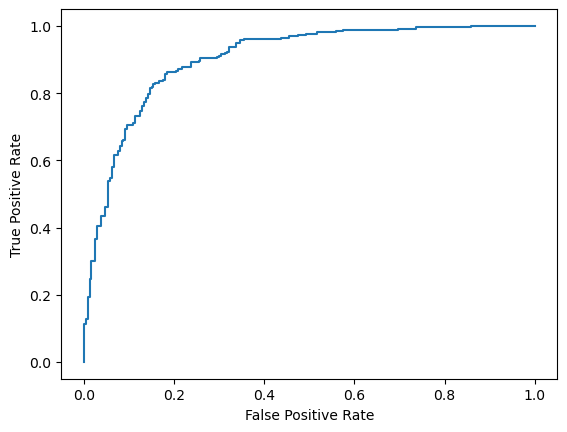

In [6]:
from sklearn.metrics import roc_curve

y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Curva de precisión-sensibilidad (Precision-Recall)

La **precisión** se calcula como el número de verdaderos positivos entre la suma de verdaderos positivos y de falsos positivos. Describe cómo de bueno es el modelo a la hora de predecir las salidas de la clase positiva. 

La curva de precisión-sensibilidad enfrenta la precisión (eje y) con la sensibilidad (eje x) para diferentes umbrales.

https://arxiv.org/pdf/1905.05441.pdf

La curva de precisión-sensibilidad es útil cuando tenemos clases desbalanceadas, donde suele ser bastante común que haya muchos registros negativos (clase 0) y muy pocos positivos (clase 1), ya que no tiene en cuenta los falsos negativos. La curva de precisión-sensibilidad solo se preocupa de la clase positiva, es decir, de la clase minoritaria.

<center><div> <img src="fig/PR.png" alt="Drawing" style="width: 700px;"/></div><center>


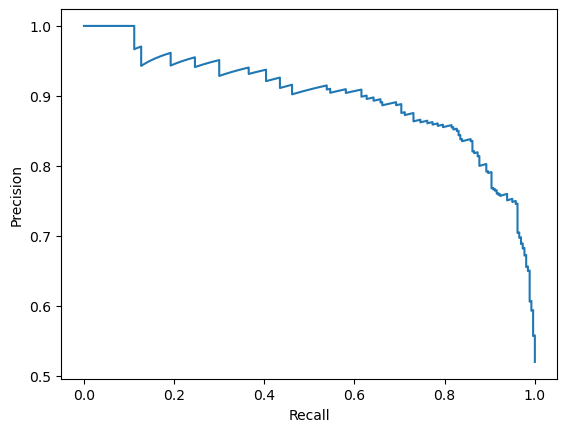

In [7]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()



El rendimiento del modelo se puede evaluar con dos valores:

**ROC**-> Área bajo la curva (AUC)

**PR** -> Valor F (F-Score) Calcula la media armónica de la precisión y la sensibilidad. 


In [8]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
   
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')   
        
        eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return eval_stats['train']['F1'], eval_stats['test']['F1']


           train  test
Exactitud   0.86  0.83
F1          0.86  0.84
APS         0.94  0.90
ROC AUC     0.94  0.90


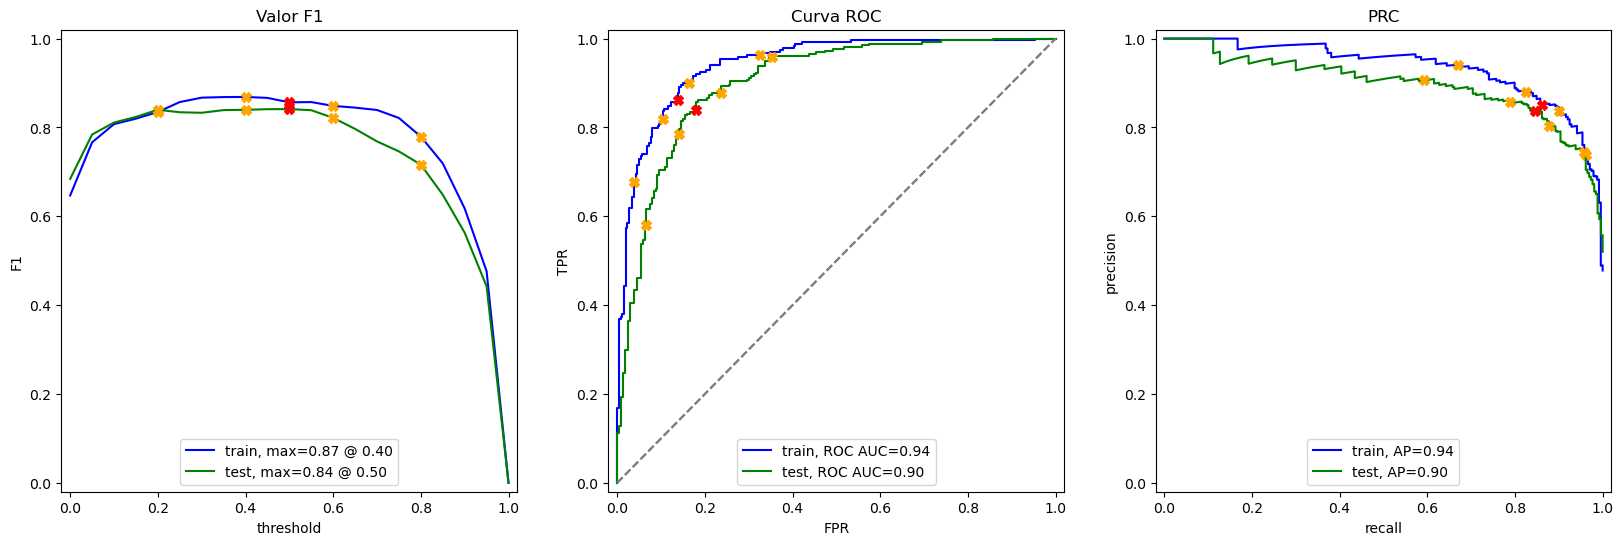

In [9]:

train_f1, test_f1 = evaluate_model(lr, x_train, y_train, x_test, y_test)

# Clases desbalanceadas

In [21]:
###### Generamos un dataset de dos clases desbalanceadas
x, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
######

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=2)
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

           train  test
Exactitud   1.00  0.98
F1          0.67  0.00
APS         1.00  0.07
ROC AUC     1.00  0.72


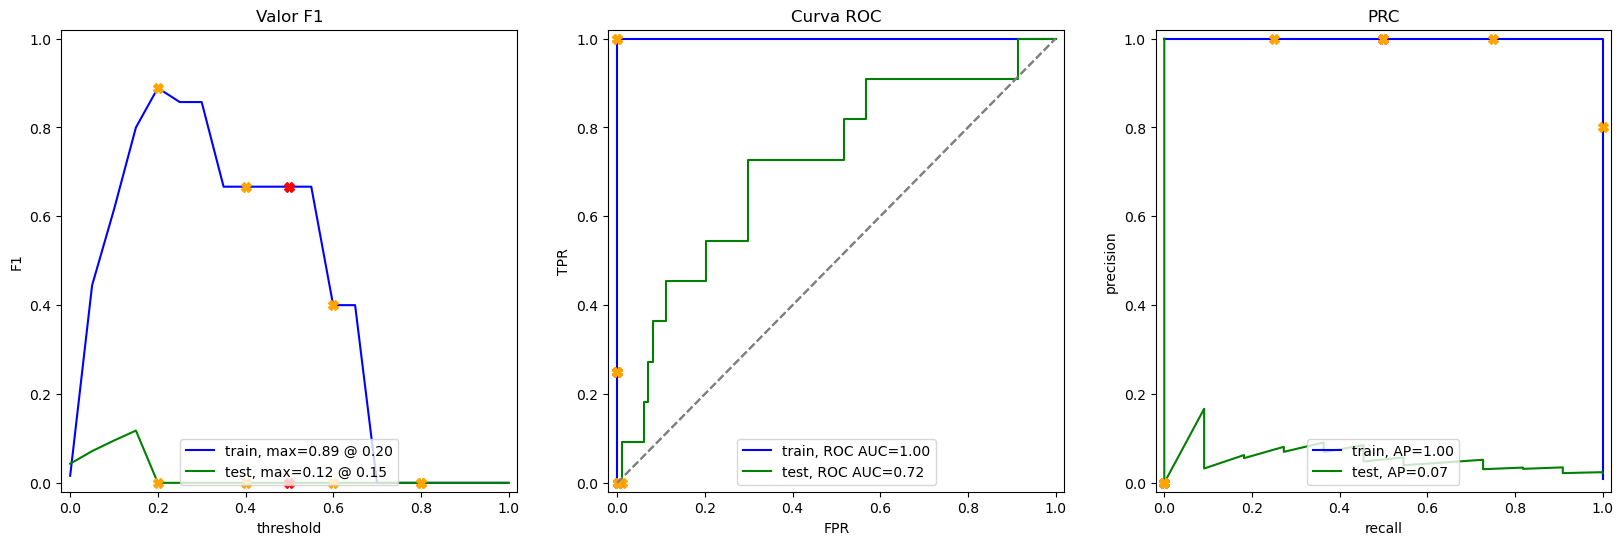

In [20]:
train_f1, test_f1 = evaluate_model(lr, x_train, y_train, x_test, y_test)